QnA 에서 찾은 정보

1. Validation set도 최종 학습에 사용 가능.
2. 발생일시는 해당 일시에 화재가 발생했는지의 의미 -> 해당 인자로 인해 기후 정보등이 도출 -> 시간별, 계절별 요인을 도출하는 인자로 활용 가능
3. 인구수는 통계청 데이터를 기반( 2018년 기준 )
4. lw 변수들은 '건축법 시행령 제5조의5 제4호'에 정의된 건축물(다중이용건축물), 연면적 합계 3천제곱미더이상인 건축물, 다중이용업소등을 대상으로 조사된 값들입니다. 해당 변수들은 0~5점 까지의 분포이며, 높을수록 좋습니다. 가스와 전기 에너지 사용량 데이터는 건축데이터 민간개방시스템(http://open.eais.go.kr/) 에서 수급된 데이터로서, 값이 없는 것들은 해당 시스템에 대상이 아닌 건축물이라는 의미이며, 0인 경우는 값이 실제 0인 경우입니다. 
5. bldng_cnt 의미 : 해당 데이터는 지적(땅의 1필지)를 기준으로 작성된 데이터 입니다. 즉 1필지의 땅에 여러채의 건물이 있는 경우가 있습니다.(예: 아파트) 그 때 건물수를 건물채수라고 함.
6. lnd_ar (토지면적) 의미 : 토지면적은 해당 필지의 면적 입니다. 토지면적이 0인 경우는 값이 누락된 경우라고 생각하시면 됩니다. 
7. 강수량같은 경우 0인 경우는 강우가 있기는 했지만 그 양이 거의 측정되지 않은 경우이며, NA의 경우는 실제 전혀 강우가 없는 경우임.
8. 













## 0. Load Dependencies & Data 

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.listdir("/content/drive/My Drive/gimhae")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


['PJT002_validation.csv', 'PJT002_test.csv', 'PJT002_train.csv']

In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [5]:
work_dir = '/content/drive/My Drive/gimhae/'

train_set = pd.read_csv((work_dir + 'PJT002_train.csv'),encoding='utf-8' )
validation_set = pd.read_csv((work_dir + 'PJT002_validation.csv'),encoding='utf-8' )
# 일단 무거우니까 test_set 놔 둠.
# test_set = pd.read_csv((work_dir + '/' + 'PJT002_test.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 0) Reshaping

어제 데이터를 보고 답이 없음을 깨달았으니, reshaping 부터 진행합니다. 목표는 gas 사용량, ele 사용량, 날짜를 각 각 한 열에 넣는 것입니다. 이를 통해 각각의 변수를 좀 유의미하게 사용하는 한편, 전처리를 용의하게 할 것입니다. 

In [0]:
# melt 함수를 통해 wide 형식의 데이터를 long form으로 바꿔줍니다. melt에 대한 설명은 https://rfriend.tistory.com/278 이 링크를 참고하시기 바랍니다. 

train_long1 = pd.melt(train_set, id_vars = ['dt_of_fr','fr_yn','bldng_us','bldng_archtctr','bldng_cnt','bldng_ar','ttl_ar','lnd_ar','dt_of_athrztn','ttl_grnd_flr',
                                            'ttl_dwn_flr','bldng_us_clssfctn','tmprtr','prcpttn','wnd_spd','wnd_drctn','hmdt','lw_13101010','lw_13101110','lw_13101210',
                                            'lw_13101211','lw_13101310','lw_13101410','lw_13111010','lw_13111110','lw_13121010','lw_13121011','lw_13131010','lw_13131110',
                                            'lw_13141010','lw_13141011','jmk','id','rgnl_ar_nm','rgnl_ar_nm2','lnd_us_sttn_nm','rd_sd_nm','emd_nm','hm_cnt','fr_sttn_dstnc',
                                            'bldng_ar_prc','fr_wthr_fclt_dstnc','fr_mn_cnt','mlt_us_yn','cctv_dstnc','fr_wthr_fclt_in_100m','cctv_in_100m','tbc_rtl_str_dstnc',
                                            'sft_emrgnc_bll_dstnc','ahsm_dstnc','no_tbc_zn_dstnc','bldng_cnt_in_50m','trgt_crtr','fr_fghtng_fclt_spcl_css_5_yn',
                                            'fr_fghtng_fclt_spcl_css_6_yn','us_yn','dngrs_thng_yn','slf_fr_brgd_yn','blk_dngrs_thng_mnfctr_yn','cltrl_hrtg_yn'], 
                      value_name = "usage")

In [40]:
# 기존에 열 이름이었던 gas_enry...가 값으로 들어간 variable열이 생성되었으며, 기존에 해당 열의 값들은 value열으로 옮겨갔습니다. 
train_long1.loc[:,['variable','usage']].head(10)

,variable,usage
0,gas_engry_us_201401,0.0
1,gas_engry_us_201401,NaN
2,gas_engry_us_201401,0.0
3,gas_engry_us_201401,0.0
4,gas_engry_us_201401,NaN
5,gas_engry_us_201401,0.0
6,gas_engry_us_201401,NaN
7,gas_engry_us_201401,0.0
8,gas_engry_us_201401,NaN
9,gas_engry_us_201401,0.0


In [41]:
# assign을 통해 우리가 원하는 변수들을 추출해 냅니다. gas_usage는 usage열에서 variable열의 맨 앞이 gas인 값을, ele_usage는 맨 앞이 ele인 값을
# ym은 variable의 마지막 값을 할당합니다. 이후 필요없어진 variable열은 제거합니다.
train_long = train_long1.assign(
    ele_usage = train_long1['usage'].loc[train_long1['variable'].str.split(pat = '_', expand = True).iloc[:,0] == 'ele'] # str.split은 pat에 할당된 값을 기준으로 문자열을 나눕니다.
).assign(
    gas_usage = train_long1['usage'].loc[train_long1['variable'].str.split(pat = '_', expand = True).iloc[:,0] == 'gas'] # expand = True를 지정해주면 결과값을 리스트에 저장합니다.
).assign(
    ym = train_long1['variable'].str.split(pat = '_', expand = True).iloc[:,3]
).drop(['variable','usage'], axis = 1)

train_long.head() # 

,dt_of_fr,fr_yn,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,bldng_us_clssfctn,tmprtr,prcpttn,wnd_spd,wnd_drctn,hmdt,lw_13101010,lw_13101110,lw_13101210,lw_13101211,lw_13101310,lw_13101410,lw_13111010,lw_13111110,lw_13121010,lw_13121011,lw_13131010,lw_13131110,lw_13141010,lw_13141011,jmk,id,rgnl_ar_nm,rgnl_ar_nm2,lnd_us_sttn_nm,rd_sd_nm,emd_nm,hm_cnt,fr_sttn_dstnc,bldng_ar_prc,fr_wthr_fclt_dstnc,fr_mn_cnt,mlt_us_yn,cctv_dstnc,fr_wthr_fclt_in_100m,cctv_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,trgt_crtr,fr_fghtng_fclt_spcl_css_5_yn,fr_fghtng_fclt_spcl_css_6_yn,us_yn,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn,ele_usage,gas_usage,ym
0,2017-10-20 05:54:00,Y,단독주택,블록구조,3,69.42,69.42,0.0,1977,1.0,0.0,주거용,10.7,NaN,0.9,200.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,106536,자연녹지지역,지정되지않음,단독,세로한면(불),경상남도 창녕군 창녕읍,17360.0,4547,NaN,133,137.0,N,112,0,0,1891,29231,11322,88,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,201401
1,2018-09-30 08:26:15,N,NaN,NaN,3,46.29,46.29,0.0,NaN,1.0,0.0,NaN,19.5,NaN,0.5,20.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,86366,계획관리지역,지정되지않음,단독,세로한면(가),경상남도 의령군 가례면,1791.0,6388,122581.0,489,85.0,N,818,0,0,4533,20480,3369,7727,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201401
2,2016-10-30 14:57:00,Y,공동주택,철근콘크리트구조,1,583.80,2516.76,1446.0,2.00011e+07,5.0,0.0,주거용,15.5,NaN,2.0,90.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,답,107560,제2종일반주거지역,지정되지않음,연립,중로한면,경상남도 창녕군 창녕읍,17285.0,3340,618105.0,143,137.0,N,165,0,0,277,31197,12451,72,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,201401
3,2016-06-14 05:23:58,N,단독주택,일반목구조,2,48.92,48.92,0.0,1936,1.0,0.0,주거용,20.6,NaN,0.4,0.0,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,97550,제1종일반주거지역,지정되지않음,단독,세로한면(불),경상남도 창원시의창구 대산면,7327.0,179,719542.0,1585,176.0,N,131,0,0,438,4270,407,508,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,201401
4,2018-04-22 05:38:59,N,NaN,NaN,2,0.00,0.00,0.0,NaN,NaN,NaN,NaN,12.7,NaN,0.6,360.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,임,130501,자연환경보전지역,지정되지않음,자연림,세로한면(불),경상남도 창녕군 창녕읍,17278.0,4822,NaN,603,137.0,N,686,0,0,1702,29778,12487,707,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201401


In [42]:
train_long.shape[0]/train_set.shape[0] # '딱 5년 * 12개월 * 변수 2개' 배 만큼 길이가 늘어났습니다. 겁나 기네요.

120.0

## 1) EDA

In [0]:
ele = train_long.loc[:,['ele_usage','fr_yn']]
gas = train_long.loc[:,['gas_usage','fr_yn']]
lw1 = train_long.loc[:,'lw_13101010':'lw_13141011']
lw = pd.concat([lw1,train_set.loc[:,'fr_yn']], axis = 1)

In [45]:
ele.head()

,ele_usage,fr_yn
0,NaN,Y
1,NaN,N
2,NaN,Y
3,NaN,N
4,NaN,N


In [56]:
lw.head()

,lw_13101010,lw_13101110,lw_13101210,lw_13101211,lw_13101310,lw_13101410,lw_13111010,lw_13111110,lw_13121010,lw_13121011,lw_13131010,lw_13131110,lw_13141010,lw_13141011,fr_yn
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


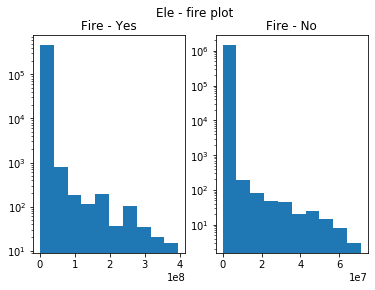

In [83]:
# 화재 여부에 따른 가스 사용량의 차이가 있는지를 시각화 합니다. 
# 기본적으로 1st bin의 도수가 너무 높으므로 log-scale로 진행합니다.

X_y = ele.loc[ele.iloc[:,1]=='Y','ele_usage'].dropna()
X_n = ele.loc[ele.iloc[:,1]=='N','ele_usage'].dropna()

fig, axes = plt.subplots(1, 2)
fig.suptitle('Ele - fire plot')

axes[0].set_title("Fire - Yes")
axes[0].hist(X_y, log = True)

axes[1].set_title("Fire - No")
axes[1].hist(X_n, log = True)

plt.show()

Fire - Yes일 때 보다 오른쪽으로 치우쳐져 있어야 할 것 같은데, 크게 차이가 없어 보입니다. 그러나 x축을 자세히 보면 단위가 다른 것을 확인할 수 있습니다. Fire - Yes는 단위가 1e8, No는 1e7입니다. 이를 보면 확실히 불이 났을 경우의 전기 사용량이 훨씬 큰 것을 알 수 있습니다. 

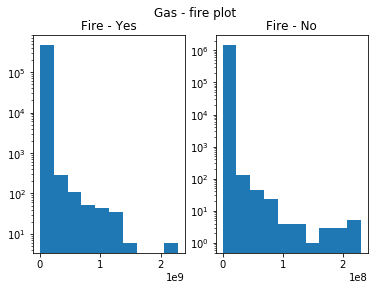

In [94]:
# 화재 여부에 따른 전기 사용량의 차이가 있는지를 시각화 합니다. 
# 마찬가지로 1st bin의 도수가 너무 높으므로 log-scale로 진행합니다.

X_y = gas.loc[gas.iloc[:,1]=='Y','gas_usage'].dropna()
X_n = gas.loc[gas.iloc[:,1]=='N','gas_usage'].dropna()

fig, axes = plt.subplots(1, 2)
fig.suptitle('Gas - fire plot')

axes[0].set_title("Fire - Yes")
axes[0].hist(X_y, log = True)

axes[1].set_title("Fire - No")
axes[1].hist(X_n, log = True)

plt.show()

마찬가지로 일견 비슷해 보이나, X축의 단위가 다릅니다. 따라서 gas역시 불이 났을 때 큰 것을 알 수 있습니다.

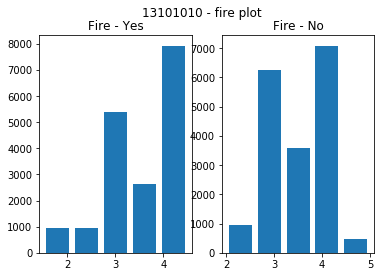

In [99]:
# 이제부터 lw의 시각화 입니다. lw가 왜 정수단위가 아닌지 모르겠지만 일단 해 봅시다

X_y = lw.loc[gas.loc[:,'fr_yn']=='Y','lw_13101010'].dropna()
X_n = lw.loc[gas.loc[:,'fr_yn']=='N','lw_13101010'].dropna()

fig, axes = plt.subplots(1, 2)
fig.suptitle('13101010 - fire plot')

axes[0].set_title("Fire - Yes")
axes[0].hist(X_y, bins = 5,rwidth=0.8)

axes[1].set_title("Fire - No")
axes[1].hist(X_n, bins = 5,rwidth=0.8)

plt.show()

In [201]:
# lw가 float로 되어있는 값의 정체를 질문했으나 아직 답을 받지 못했습니다. 일단은 시각화를 위해서 반올림하겠습니다.
lw_round = lw.dropna().round()
lw_13101010_tap = pd.crosstab(lw_round.fr_yn,lw_round.lw_13101010)
lw_13101010_tap.loc[:,'yn'] = ['Y',"N"]
lw_13101010_1 = lw_13101010_tap.melt(id_vars = 'yn')
lw_13101010_1

,yn,lw_13101010,value
0,Y,2,8
1,N,2,11
2,Y,3,59
3,N,3,46
4,Y,4,69
5,N,4,74
6,Y,5,2
7,N,5,0


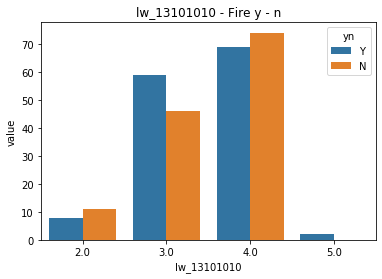

In [202]:
import seaborn as sns 
sns.barplot(x='lw_13101010', y='value', hue='yn', data=lw_13101010_1,dodge=True) 
plt.title('lw_13101010 - Fire y - n') #복도 계단 출입구의 성능 유지여부
plt.show()

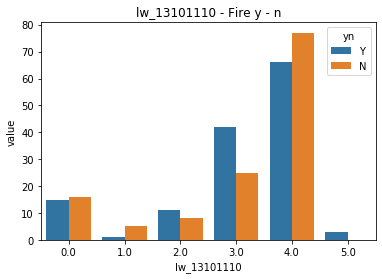

In [204]:
lw_13101110_tap = pd.crosstab(lw_round.fr_yn,lw_round.lw_13101110)
lw_13101110_tap.loc[:,'yn'] = ['Y',"N"]
lw_13101110_1 = lw_13101110_tap.melt(id_vars = 'yn')

sns.barplot(x='lw_13101110', y='value', hue='yn', data=lw_13101110_1,dodge=True) 
plt.title('lw_13101110 - Fire y - n') #옥상광장의 피난성능 유지여부
plt.show()

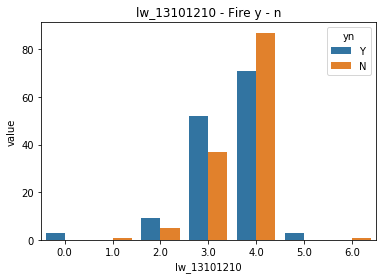

In [205]:
lw_13101210_tap = pd.crosstab(lw_round.fr_yn,lw_round.lw_13101210)
lw_13101210_tap.loc[:,'yn'] = ['Y',"N"]
lw_13101210_1 = lw_13101210_tap.melt(id_vars = 'yn')

sns.barplot(x='lw_13101210', y='value', hue='yn', data=lw_13101210_1,dodge=True) 
plt.title('lw_13101210 - Fire y - n') #방화문, 방화셔터등의 성능 유지여부
plt.show()

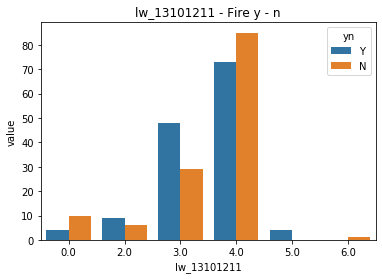

In [206]:
lw_13101211_tap = pd.crosstab(lw_round.fr_yn,lw_round.lw_13101211)
lw_13101211_tap.loc[:,'yn'] = ['Y',"N"]
lw_13101211_1 = lw_13101211_tap.melt(id_vars = 'yn')

sns.barplot(x='lw_13101211', y='value', hue='yn', data=lw_13101211_1,dodge=True) 
plt.title('lw_13101211 - Fire y - n') # 방화구획 적합 여부
plt.show()

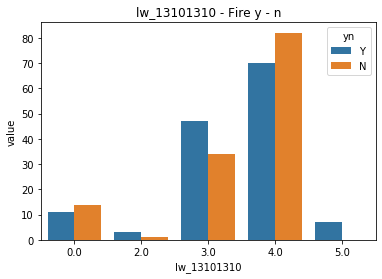

In [208]:
lw_13101310_tap = pd.crosstab(lw_round.fr_yn,lw_round.lw_13101310)
lw_13101310_tap.loc[:,'yn'] = ['Y',"N"]
lw_13101310_1 = lw_13101310_tap.melt(id_vars = 'yn')

sns.barplot(x='lw_13101310', y='value', hue='yn', data=lw_13101310_1,dodge=True) 
plt.title('lw_13101310 - Fire y - n') #경계벽 및 칸막이벽의 변경 등 방화성능 유지여부(0~5)
plt.show()

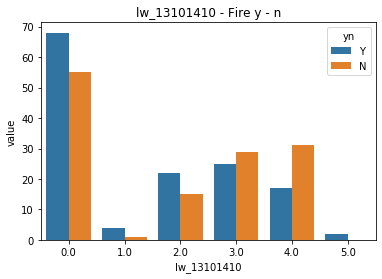

In [209]:
lw_13101410_tap = pd.crosstab(lw_round.fr_yn,lw_round.lw_13101410)
lw_13101410_tap.loc[:,'yn'] = ['Y',"N"]
lw_13101410_1 = lw_13101410_tap.melt(id_vars = 'yn')

sns.barplot(x='lw_13101410', y='value', hue='yn', data=lw_13101410_1,dodge=True) 
plt.title('lw_13101410 - Fire y - n') #배연설비의 성능 유지여부(0~5)
plt.show()

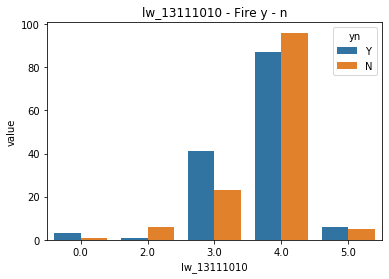

In [210]:
lw_13111010_tap = pd.crosstab(lw_round.fr_yn,lw_round.lw_13111010)
lw_13111010_tap.loc[:,'yn'] = ['Y',"N"]
lw_13111010_1 = lw_13111010_tap.melt(id_vars = 'yn')

sns.barplot(x='lw_13111010', y='value', hue='yn', data=lw_13111010_1,dodge=True) 
plt.title('lw_13111010 - Fire y - n') #내화구조의 성능 유지여부(0~5)
plt.show()

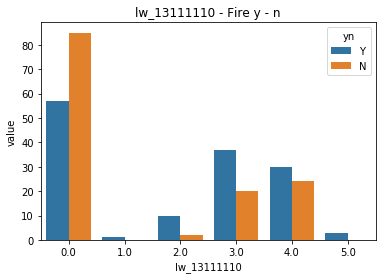

In [211]:
lw_13111110_tap = pd.crosstab(lw_round.fr_yn,lw_round.lw_13111110)
lw_13111110_tap.loc[:,'yn'] = ['Y',"N"]
lw_13111110_1 = lw_13111110_tap.melt(id_vars = 'yn')

sns.barplot(x='lw_13111110', y='value', hue='yn', data=lw_13111110_1,dodge=True) 
plt.title('lw_13111110 - Fire y - n') #방화벽의 성능 유지여부
plt.show()

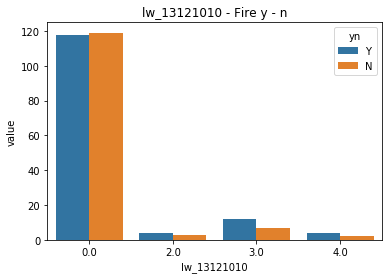

In [212]:
lw_13121010_tap = pd.crosstab(lw_round.fr_yn,lw_round.lw_13121010)
lw_13121010_tap.loc[:,'yn'] = ['Y',"N"]
lw_13121010_1 = lw_13121010_tap.melt(id_vars = 'yn')

sns.barplot(x='lw_13121010', y='value', hue='yn', data=lw_13121010_1,dodge=True) 
plt.title('lw_13121010 - Fire y - n') # 외벽의 성능 유지여부
plt.show()

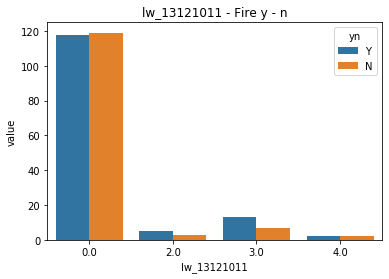

In [213]:
lw_13121011_tap = pd.crosstab(lw_round.fr_yn,lw_round.lw_13121011)
lw_13121011_tap.loc[:,'yn'] = ['Y',"N"]
lw_13121011_1 = lw_13121011_tap.melt(id_vars = 'yn')

sns.barplot(x='lw_13121011', y='value', hue='yn', data=lw_13121011_1,dodge=True) 
plt.title('lw_13121011 - Fire y - n') # 창호의 성능 유지여부
plt.show()

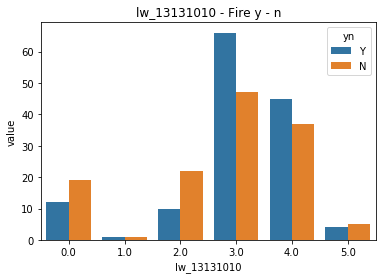

In [214]:
lw_13131010_tap = pd.crosstab(lw_round.fr_yn,lw_round.lw_13131010)
lw_13131010_tap.loc[:,'yn'] = ['Y',"N"]
lw_13131010_1 = lw_13131010_tap.melt(id_vars = 'yn')

sns.barplot(x='lw_13131010', y='value', hue='yn', data=lw_13131010_1,dodge=True) 
plt.title('lw_13131010 - Fire y - n') # 내부마감의 방화성능 유지여부
plt.show()

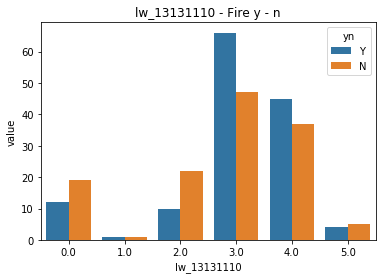

In [215]:
lw_13131110_tap = pd.crosstab(lw_round.fr_yn,lw_round.lw_13131110)
lw_13131110_tap.loc[:,'yn'] = ['Y',"N"]
lw_13131110_1 = lw_13131110_tap.melt(id_vars = 'yn')

sns.barplot(x='lw_13131110', y='value', hue='yn', data=lw_13131110_1,dodge=True) 
plt.title('lw_13131110 - Fire y - n') # 외부마감의 노후화 및 마감재 탈락 여부
plt.show()

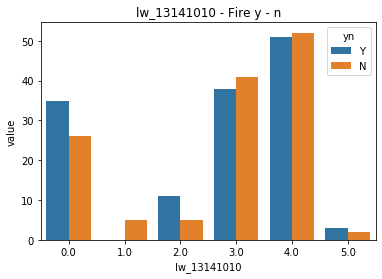

In [216]:
lw_13141010_tap = pd.crosstab(lw_round.fr_yn,lw_round.lw_13141010)
lw_13141010_tap.loc[:,'yn'] = ['Y',"N"]
lw_13141010_1 = lw_13141010_tap.melt(id_vars = 'yn')

sns.barplot(x='lw_13141010', y='value', hue='yn', data=lw_13141010_1,dodge=True) 
plt.title('lw_13141010 - Fire y - n') # 지하층의 소방설비 성능 유지여부
plt.show()

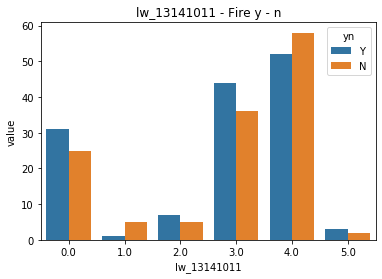

In [217]:
lw_13141011_tap = pd.crosstab(lw_round.fr_yn,lw_round.lw_13141011)
lw_13141011_tap.loc[:,'yn'] = ['Y',"N"]
lw_13141011_1 = lw_13141011_tap.melt(id_vars = 'yn')

sns.barplot(x='lw_13141011', y='value', hue='yn', data=lw_13141011_1,dodge=True) 
plt.title('lw_13141011 - Fire y - n') # 자하층 피난구, 피난계단의 성능 유지여부
plt.show()